# Inicialización

In [1]:
import pandas as pd  
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Cargar datos

In [3]:
games = pd.read_csv('D:/TripleTen/games.csv')

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Podemos observar que falta datos en algunas columnas como 'Year_of_Release', 'Critic_score', 'Rating', 'User_score'. Al igual que hay datos NaN en las columnas de score y rating

## Preparar y corregir datos

In [7]:
games = games.rename(columns=str.lower)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce')

Se convierte la columna 'year_of_release' de flotante a entero ya que es más apropiado para representar los años. 
Se convierten las columnas 'critic_score' y 'user_score' a flotante, ya que las puntuaciones pueden tener decimales.

In [9]:
games['year_of_release'] = games['year_of_release'].fillna(games['year_of_release'].median())
games['year_of_release'].isna().value_counts()

year_of_release
False    16715
Name: count, dtype: int64

In [10]:
games['critic_score'] = games['critic_score'].fillna(games['critic_score'].median())
games['critic_score'].isna().value_counts()


critic_score
False    16715
Name: count, dtype: int64

In [11]:
games['user_score'] = games['user_score'].fillna(games['user_score'].median())
games['user_score'].isna().value_counts()

user_score
False    16715
Name: count, dtype: int64

Es posible que hayan valores ausentes debido a error humano o técnico durante la recopilación de los fatos, también existe la posibilidad de que no se hayan obtenido datos para ciertos juegos o regiones.

Se rellenaron con 0 columnas en las que podemos asumir que no hubo ventas en dicha región para dicho juego. Se utilizó la mediana para rellenar los datos de 'year_of_release', 'critic_score' y 'user_score' ya que es más representativo y reduce el impacto de datos aberrantes.

In [12]:
columnas_categoricas = ['platform', 'genre', 'rating']
for col in columnas_categoricas:
    games[col] = games[col].fillna(games[col].mode()[0])


Como 'rating', 'genre' y 'platform' representan valores categóricos, se convirtieron a datos tipo categóricos. Lo que mejorá la eficiencia y permite un analásis categórico específico.

En el caso de los datos 'TBD' se podrían eliminar estos registros si no son relevantes para el análisis actual.

In [13]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16715, dtype: float64

In [14]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,7.5,E,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,E,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,71.0,7.5,E,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,71.0,7.5,E,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,E,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,71.0,7.5,E,0.01


## Estudiar y analizar el comportamiento de los datos

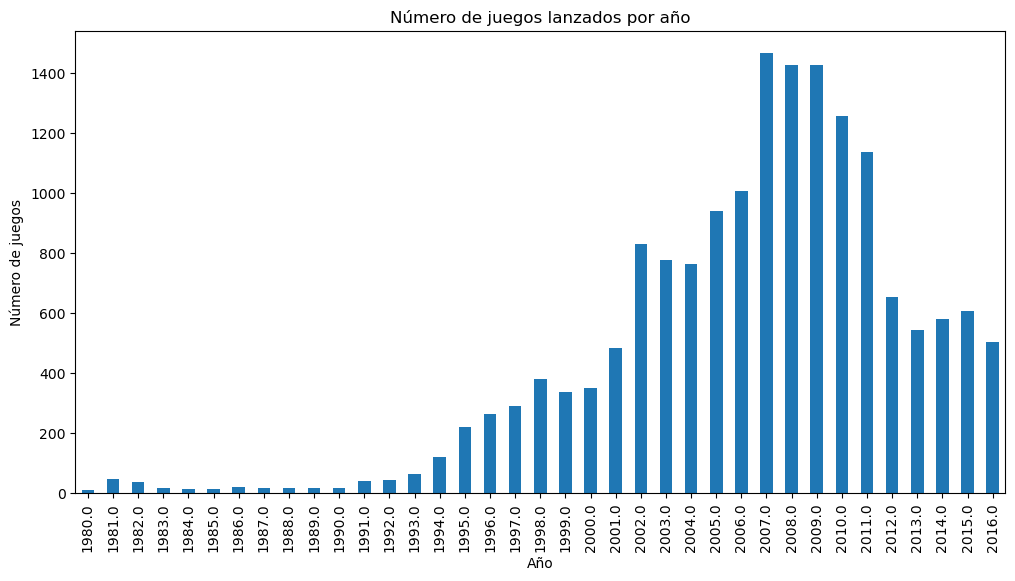

In [15]:
juegos_por_año = games.groupby('year_of_release').size()
plt.figure(figsize=(12, 6))
juegos_por_año.plot(kind='bar')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Número de juegos')
plt.show()

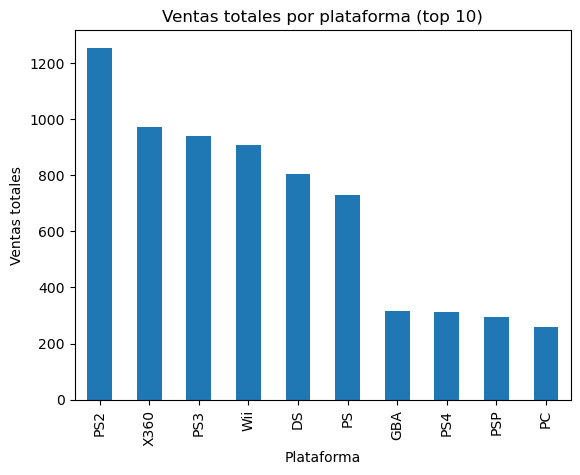

In [16]:
ventas_por_plataforma = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_10_plataformas = ventas_por_plataforma.head(10)
top_10_plataformas.plot(kind='bar')
plt.title('Ventas totales por plataforma (top 10)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.show()

Podemos observar que las plataformas como PS y Xbox tienen el mayor número de ventas.

In [17]:
datos_2010_en_adelante = games[games['year_of_release'] >= 2010]
datos_2010_en_adelante

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,71.0,7.5,E,15.13
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,E,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,71.0,7.5,E,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,71.0,7.5,E,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,E,0.01


Al incluir datos a partir de 2010, aseguramos que las plataformas que ya estaban establecidas en ese momento tengan suficiente historial de ventas para analizar su ciclo de vida. Por otra parte, un periodo de 7 años nos proporciona una muestra de datos lo suficientemente grande para identificar patrones y tendencias significativas, reduciendo así los impactos de las fluctuaciones a corto plazo.

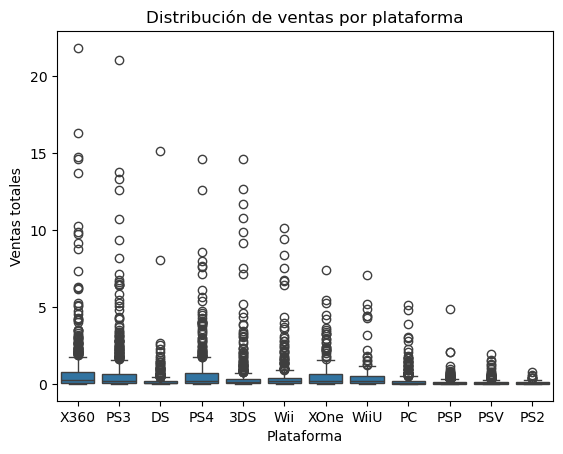

In [18]:
sns.boxplot(x='platform', y='total_sales', data=datos_2010_en_adelante)
plt.title('Distribución de ventas por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.show()

In [19]:
plataformas = games['platform'].unique()
indices_eliminar = []

for plataforma in plataformas:
    datos_plataforma = games[games['platform'] == plataforma]
    Q1 = datos_plataforma['total_sales'].quantile(0.25)
    Q3 = datos_plataforma['total_sales'].quantile(0.75)
    IQR = Q3 - Q1
    
    indices_outliers = datos_plataforma[(datos_plataforma['total_sales'] < Q1 - 1.5*IQR) | (datos_plataforma['total_sales'] > Q3 + 1.5*IQR)].index
    indices_eliminar.extend(indices_outliers)
    
games_sin_outliers = games.drop(indices_eliminar)
games_sin_outliers

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
300,Golf,NES,1984.0,Sports,1.22,0.28,2.46,0.04,71.0,7.5,E,4.00
309,Donkey Kong Land,GB,1994.0,Platform,1.97,0.76,1.07,0.11,71.0,7.5,E,3.91
316,Dragon Warrior III,NES,1988.0,Role-Playing,0.10,0.00,3.77,0.00,71.0,7.5,E,3.87
322,The Legend of Zelda: Link's Awakening,GB,1992.0,Action,2.21,0.96,0.54,0.13,71.0,7.5,E,3.84
339,Pokémon Trading Card Game,GB,1998.0,Strategy,1.49,0.73,1.38,0.10,71.0,7.5,E,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,71.0,7.5,E,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,71.0,7.5,E,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,E,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,71.0,7.5,E,0.01


Podemos observar que en todas las plataformas tienen valores aberrantes, que son juegos que estan muy lejos del promedio, viendo el caso del Xbox360 donde su promedio de ventas totales es bastante amplia, aun así existen otro gran número de juegos con un número de ventas mucho mayor al promedio para esa consola.

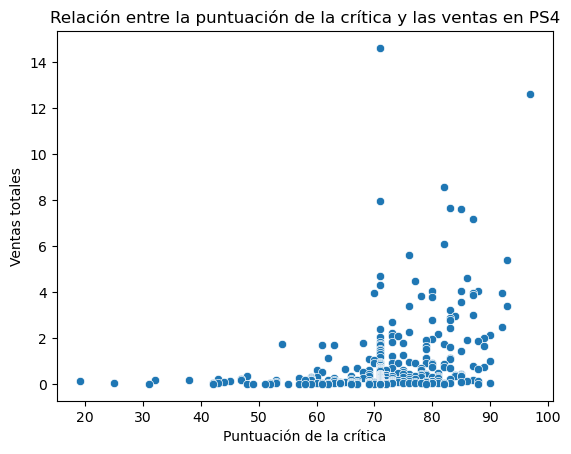

In [20]:
juegos_ps4 = games[games['platform'] == 'PS4']
sns.scatterplot(x='critic_score', y='total_sales', data=juegos_ps4)
plt.title('Relación entre la puntuación de la crítica y las ventas en PS4')
plt.xlabel('Puntuación de la crítica')
plt.ylabel('Ventas totales')
plt.show()

In [21]:
correlacion = juegos_ps4['critic_score'].corr(juegos_ps4['total_sales'])
correlacion

0.3387064530024634

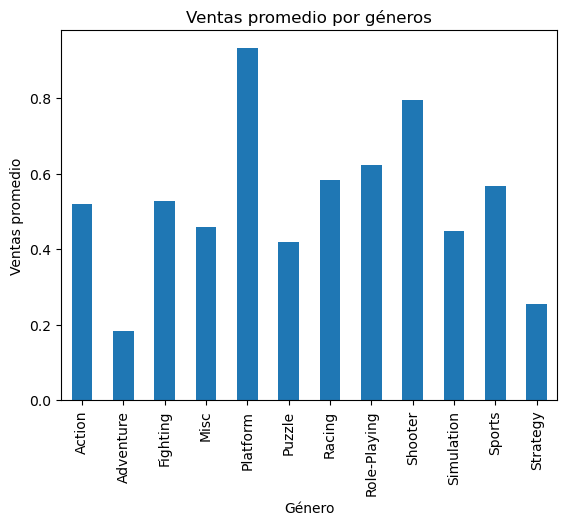

In [22]:
ventas_por_genero = games.groupby('genre')['total_sales'].mean()
ventas_por_genero.plot(kind='bar')
plt.title('Ventas promedio por géneros')
plt.xlabel('Género')
plt.ylabel('Ventas promedio')
plt.show()

La gráfica nos muestra que existe una mayor venta de juegos del género de plataformas seguido por los shooters, mientras que por el otro lado podemos notar que los géneros menos vendidos son el de aventura seguido por el género de estrategia.

In [23]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


## Estudiando y analizando los datos por región

In [24]:
def top_5_platforms(games, region):
    platform_sales = games.groupby('platform')[region + '_sales'].sum().sort_values(ascending=False)
    top_5 = platform_sales.head(5)
    
    return top_5


In [25]:
top_5_na = top_5_platforms(games, 'na')
top_5_eu = top_5_platforms(games, 'eu')
top_5_jp = top_5_platforms(games, 'jp')

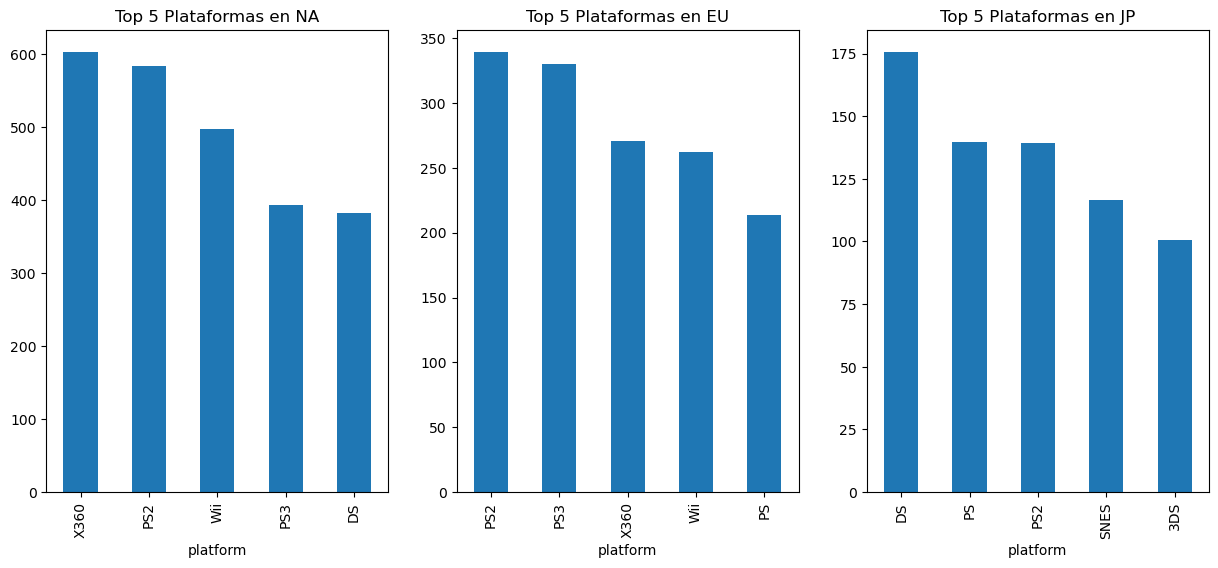

In [26]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
top_5_na.plot(kind='bar', title='Top 5 Plataformas en NA')
plt.subplot(1, 3, 2)
top_5_eu.plot(kind='bar', title='Top 5 Plataformas en EU')
plt.subplot(1, 3, 3)
top_5_jp.plot(kind='bar', title='Top 5 Plataformas en JP')
plt.show()

Podemos notar que en la región NA hay un mayor número de ventas en general que en las otras dos regiones, siendo la región de JP la que cuenta con menor número de ventas. De igual manera se puede observar como las regiones de NA y EU tienen, dentro de su top 5 de plataformas, las mismas consolas difiriendo solo en una, mientras que al ser comparadas con la región JP el top 5 difiere bastante.

In [27]:
def top_5_genres(games, region):
    genre_sales = games.groupby('genre')[region + '_sales'].sum().sort_values(ascending=False)
    top_5 = genre_sales.head(5)
    
    return top_5

In [28]:
top_5_genres_na = top_5_genres(games, 'na')
top_5_genres_eu = top_5_genres(games, 'eu')
top_5_genres_jp = top_5_genres(games, 'jp')

In [29]:
top_5_genres_na

genre
Action      880.79
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

In [30]:
top_5_genres_eu

genre
Action     519.66
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

In [31]:
top_5_genres_jp

genre
Role-Playing    355.41
Action          161.46
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


En este caso podemos ver que las 3 regiones cuentan con los géneros de acción y deportes en los primeros 3 lugares, siendo NA y EU los 2 primeros, mientras que en JP el primer puesto se lo lleva el género de Juego de rol. Fuera de eso el top 5 de género es bastante similar en las 3 regiones.

In [32]:
esrb_sales_na = games.groupby('rating')['na_sales'].sum()
esrb_sales_eu = games.groupby('rating')['eu_sales'].sum()
esrb_sales_jp = games.groupby('rating')['jp_sales'].sum()

<Axes: title={'center': 'Ventas por Clasificación ESRB en NA'}, xlabel='rating'>

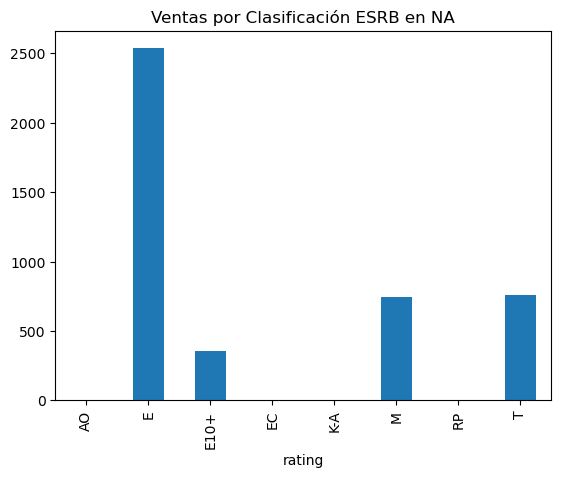

In [33]:
esrb_sales_na.plot(kind='bar', title='Ventas por Clasificación ESRB en NA')

<Axes: title={'center': 'Ventas por Clasificación ESRB en EU'}, xlabel='rating'>

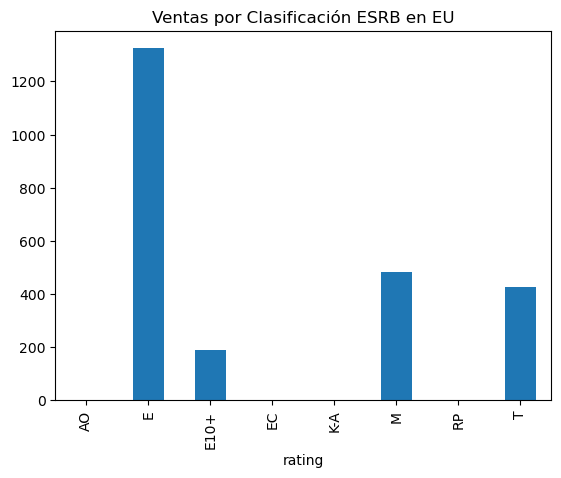

In [34]:
esrb_sales_eu.plot(kind='bar', title='Ventas por Clasificación ESRB en EU')

<Axes: title={'center': 'Ventas por Clasificación ESRB en JP'}, xlabel='rating'>

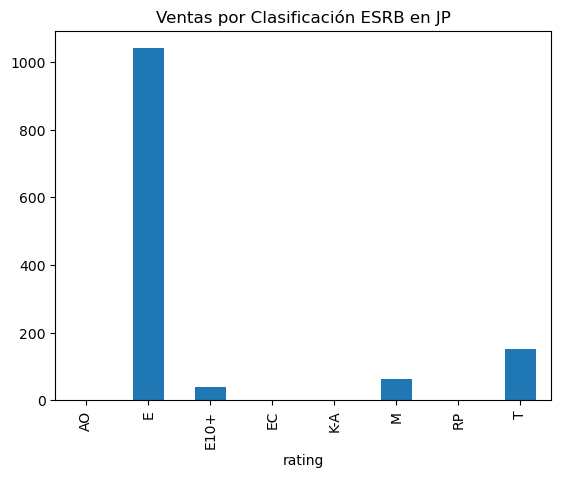

In [35]:
esrb_sales_jp.plot(kind='bar', title='Ventas por Clasificación ESRB en JP')

En las 3 regiones notamos que la categoría con una mayor número de ventas es la E con una diferencia abrumadora.

## Pruebas de hipótesis

In [36]:
ratings_xone = games_sin_outliers[games_sin_outliers['platform'] == 'XOne']['user_score']
ratings_pc = games_sin_outliers[games_sin_outliers['platform'] == 'PC']['user_score']

In [37]:
levene, p_value = stats.levene(ratings_xone, ratings_pc)
if p_value > 0.05:
    print("Las varianzas son iguales.")
else:
    print("Las varianzas son diferentes.")

Las varianzas son iguales.


In [39]:
t_statistic, p_value = stats.ttest_ind(ratings_xone, ratings_pc, equal_var=True)
p_value

0.0014191741181595807

In [40]:
if p_value > 0.05:
    print("Se rechaza la hipótesis nula. Hay evidencia estadística suficiente para concluir que el promedio de las calificaciones de los usuarios para Xbox One es igual al promedio de las calificaciones de los usuarios para PC")
else:
    print('No se rechaza la hipótesis nula. No hay evidencia estadística suficiente para concluir que el promedio de las calificaciones de los usuarios para Xbox One es igual al promedio de las calificaciones de los usuarios para PC')

No se rechaza la hipótesis nula. No hay evidencia estadística suficiente para concluir que el promedio de las calificaciones de los usuarios para Xbox One es igual al promedio de las calificaciones de los usuarios para PC


In [41]:
ratings_accion = games_sin_outliers[games_sin_outliers['genre'] == 'Action']['user_score']
ratings_deporte = games_sin_outliers[games_sin_outliers['genre'] == 'Sports']['user_score']

In [42]:
levene, p_value = stats.levene(ratings_accion, ratings_deporte)
if p_value > 0.05:
    print("Las varianzas son iguales.")
else:
    print("Las varianzas son diferentes.")

Las varianzas son iguales.


In [44]:
t_statistic, p_value = stats.ttest_ind(ratings_accion, ratings_deporte, equal_var=True)
p_value

0.4637634330483845

In [45]:
if p_value > 0.05:
    print("Se recahza la hipótesis nula. Hay evidencia suficiente para concluir que el promedio de las calificaciones de los usuarios para los géneros de Acción y Deportes es igual.")
else:
    print('No se rechaza la hipótesis nula. No hay evidencia suficiente para concluir que el promedio de las calificaciones de los usuarios para los géneros de Acción y Deportes es igual.')

Se recahza la hipótesis nula. Hay evidencia suficiente para concluir que el promedio de las calificaciones de los usuarios para los géneros de Acción y Deportes es igual.


En ambos casos use como hipótesis nula la instancia en la que ambos promedios, en cuanto a plataformas o géneros, son iguales. Mientras que para la hipótesis alternativa use el evento en que los promedios fueran diferentes. Opté por usar una prueba t de Student, ya que esta prueba asume que las muestras se extraen de poblaciones normales, las varianzas de las poblaciones son iguales y que los datos son independientes.